In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 8545.23it/s]


In [6]:
# gpd.GeoDataFrame(edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('edges_0408.GPKG',driver='GPKG')

In [7]:
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [8]:
city_sub_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  
0        (1, 0)  
1        (3, 2)  
2        (5, 4)  
3        (7, 6)  
4      (492, 8)  
..          ...  
957  (463, 803)  
958  (803, 462)  
959  (246, 804)  
960  (804, 463)  
961  (256, 249)  

[962 rows x 12 columns]

In [9]:
# delete 3 pairs useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [10]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [11]:
# gpd.GeoDataFrame(city_sub_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_sub_edges_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_stations[['osm_id', 'geometry','name']]).to_file('city_sub_stations_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_nodes[['geometry','degree','id']]).to_file('city_sub_nodes_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_routes[['osm_id', 'route', 'name', 'geometry']]).to_file('city_sub_routes_0329.GPKG',driver='GPKG')

In [12]:
# # 将DataFrame保存为pickle文件
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [13]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}

In [14]:
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [15]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [16]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [17]:
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [18]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [19]:
# Create a graph representing the subway network using the extracted edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [20]:
# city_sub_all_shortest_paths_id_dict

In [21]:
def edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges):
    # Get the keys of city_sub_all_shortest_paths_id_dict
    routes = list(city_sub_all_shortest_paths_id_dict.keys())

    # Collect all combinations of node IDs
    collect_all = []
    for route in routes:
        node_ids = city_sub_all_shortest_paths_id_dict[route]
        # Form pairs of consecutive node IDs
        collect_all.append(list(zip(node_ids, node_ids[1:] + node_ids[:1]))[:-1])

    # Flatten the list of lists and make it unique
    all_combinations = list(set(list(itertools.chain(*collect_all))))

    # Collect new order of edges and their indices
    collect_new_order = []
    collect_index = []

    index = 0
    for item in list(zip(city_sub_edges.from_id,city_sub_edges.to_id)):
        for ordered in all_combinations:
            # Check if the edge order matches any of the combinations
            if sorted(item) == sorted(ordered):
                if sum(item) == sum(ordered):
                    collect_new_order.append(ordered)
                    collect_index.append(index)
        index += 1
    
    # Create DataFrame for new ordered edges
    new_ordered_edges_from_to = pd.DataFrame(pd.Series(collect_new_order).tolist(), columns=['from_id_new','to_id_new'], index=collect_index)
    # Merge new ordered edges with original edges
    new_ordered_edges = new_ordered_edges_from_to.merge(city_sub_edges, left_index=True, right_index=True, how='outer')
    
    # Fill missing values with original values
    new_ordered_edges.from_id_new = new_ordered_edges.from_id_new.fillna(new_ordered_edges.from_id)
    new_ordered_edges.to_id_new = new_ordered_edges.to_id_new.fillna(new_ordered_edges.to_id)

    # Convert columns to integer type
    new_ordered_edges[['from_id_new', 'to_id_new','id','weights']] = new_ordered_edges[['from_id_new', 'to_id_new','id','weights']].astype(int)

    new_ordered_edges = new_ordered_edges.drop(columns=['from_id', 'to_id','from_to','to_from'])
    new_ordered_edges = new_ordered_edges.rename(columns={'from_id_new': 'from_id', 'to_id_new':'to_id'})

    new_ordered_edges['from_to'] = [(from_id, to_id) for from_id, to_id in zip(new_ordered_edges['from_id'], new_ordered_edges['to_id'])]
    new_ordered_edges['to_from'] = [(to_id, from_id) for to_id, from_id in zip(new_ordered_edges['to_id'], new_ordered_edges['from_id'])]
    return new_ordered_edges

In [22]:
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)
city_sub_ordered_edges

from_id  to_id      osm_id  \
0          1      0    23157994   
1          2      3    23158053   
2          4      5    23158054   
3          7      6    23189033   
4        492      8    23189039   
..       ...    ...         ...   
935      803    463  1131538381   
936      462    803  1131538382   
937      246    804  1131538383   
938      804    463  1131538384   
939      256    249  1131538385   

                                              geometry railway service   id  \
0    LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway    None    0   
1    LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway    None    1   
2    LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway    None    2   
3    LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway    None    3   
4    LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway    None    4   
..                                                 ...     ...     ...  ...   
935  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway    None  957   
936  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway    None  958   
937  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway    None  959   
938  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway    None  960   
939  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway    None  961   

       distance      time  weights     from_to     to_from  
0    258.660599  0.010346      258      (1, 0)      (0, 1)  
1    215.433271  0.008617      215      (2, 3)      (3, 2)  
2    121.794737  0.004872      121      (4, 5)      (5, 4)  
3     28.046592  0.001122       28      (7, 6)      (6, 7)  
4    382.935219  0.015317      382    (492, 8)    (8, 492)  
..          ...       ...      ...         ...         ...  
935   73.656989  0.002946       73  (803, 463)  (463, 803)  
936    9.568427  0.000383        9  (462, 803)  (803, 462)  
937    9.568874  0.000383        9  (246, 804)  (804, 246)  
938   73.789113  0.002952       73  (804, 463)  (463, 804)  
939   40.444210  0.001618       40  (256, 249)  (249, 256)  

[940 rows x 12 columns]

In [23]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
edges_list

[(1.0, 0.0, {'weight': 0.6207854365212626}),
 (2.0, 3.0, {'weight': 0.51703985100997}),
 (4.0, 5.0, {'weight': 0.2923073697407535}),
 (7.0, 6.0, {'weight': 0.06731182124719239}),
 (492.0, 8.0, {'weight': 0.9190445258813835}),
 (6.0, 492.0, {'weight': 0.15538600481345932}),
 (9.0, 10.0, {'weight': 0.6181801577674384}),
 (11.0, 9.0, {'weight': 0.09835408828942989}),
 (12.0, 13.0, {'weight': 0.14650744768477605}),
 (14.0, 15.0, {'weight': 0.18535436113274514}),
 (16.0, 17.0, {'weight': 0.14107374625101107}),
 (18.0, 19.0, {'weight': 0.04713573041894097}),
 (20.0, 18.0, {'weight': 0.24193770136401635}),
 (21.0, 842.0, {'weight': 0.387022194276566}),
 (842.0, 22.0, {'weight': 0.5335161007984174}),
 (23.0, 24.0, {'weight': 0.22544511322674887}),
 (25.0, 23.0, {'weight': 0.14200832772300492}),
 (26.0, 27.0, {'weight': 0.152328922555105}),
 (28.0, 29.0, {'weight': 0.11699022219555612}),
 (30.0, 31.0, {'weight': 0.10983683912963174}),
 (29.0, 807.0, {'weight': 0.09610957405248985}),
 (807.0, 32

In [24]:
# Extract the nodes from the input GeoDataFrame and create a list of node IDs
nodes_list = nodes.iloc[:,2].tolist()
nodes_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [25]:
G = nx.DiGraph()
for _, row in nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

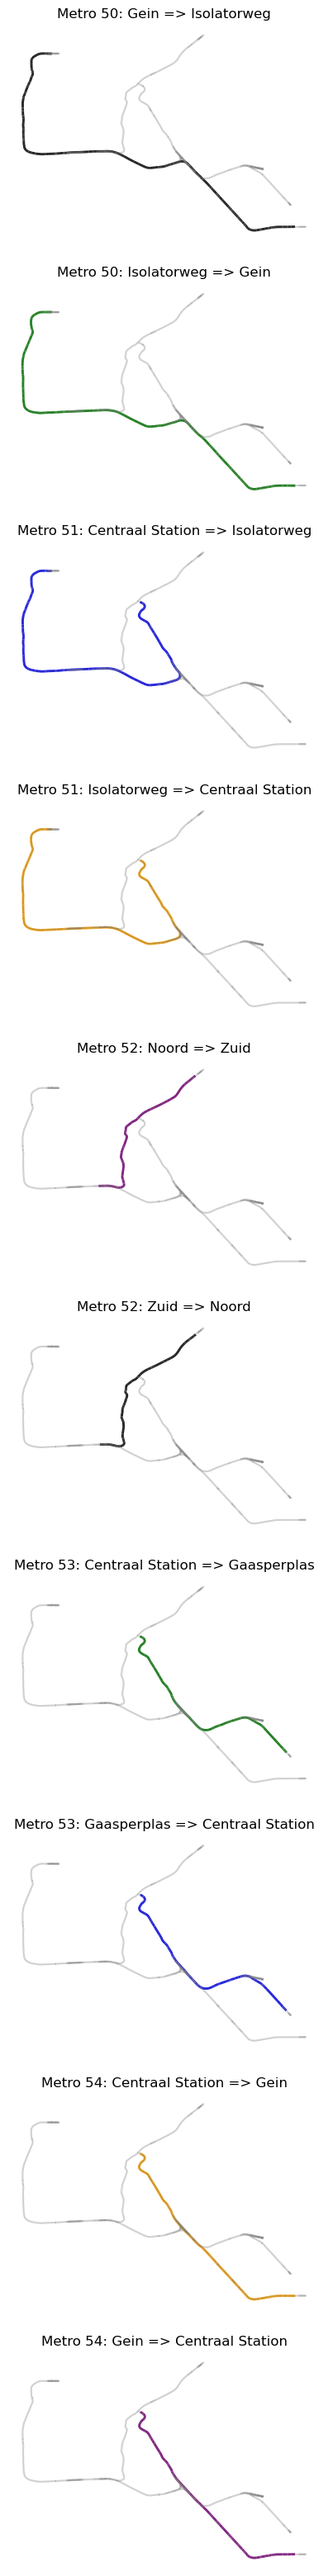

In [26]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

In [27]:
# df50_1 = city_sub_shortest_path_edges_dict['Metro 50: Gein => Isolatorweg']
# df50_2 = city_sub_shortest_path_edges_dict['Metro 50: Isolatorweg => Gein']

# df51_1 = city_sub_shortest_path_edges_dict['Metro 51: Centraal Station => Isolatorweg']
# df51_2 = city_sub_shortest_path_edges_dict['Metro 51: Isolatorweg => Centraal Station']

# df52_1 = city_sub_shortest_path_edges_dict['Metro 52: Noord => Zuid'] 
# df52_2 = city_sub_shortest_path_edges_dict['Metro 52: Zuid => Noord']

# df53_1 = city_sub_shortest_path_edges_dict['Metro 53: Centraal Station => Gaasperplas']
# df53_2 = city_sub_shortest_path_edges_dict['Metro 53: Gaasperplas => Centraal Station']

# df54_1 = city_sub_shortest_path_edges_dict['Metro 54: Centraal Station => Gein']
# df54_2 = city_sub_shortest_path_edges_dict['Metro 54: Gein => Centraal Station']

In [28]:
# gpd.GeoDataFrame(df50_1[['osm_id', 'geometry','id']]).to_file('df50_1_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df50_2[['osm_id', 'geometry','id']]).to_file('df50_2_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df51_1[['osm_id', 'geometry','id']]).to_file('df51_1_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df51_2[['osm_id', 'geometry','id']]).to_file('df51_2_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df52_1[['osm_id', 'geometry','id']]).to_file('df52_1_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df52_2[['osm_id', 'geometry','id']]).to_file('df52_2_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df53_1[['osm_id', 'geometry','id']]).to_file('df53_1_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df53_2[['osm_id', 'geometry','id']]).to_file('df53_2_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df54_1[['osm_id', 'geometry','id']]).to_file('df54_1_0411.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df54_2[['osm_id', 'geometry','id']]).to_file('df54_2_0411.GPKG',driver='GPKG')

## Add columns to stations

In [29]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [30]:
city_sub_new_nodes = add_columns_to_nodes(city_sub_order_route_dict, nodes)

In [31]:
city_sub_new_nodes

geometry  degree   id                 name     geo_x  \
0   POINT (4.98916 52.29641)       2  328                 Gein  4.989161   
1   POINT (4.97400 52.29564)       2  855           Reigersbos  4.974000   
2   POINT (4.96013 52.29813)       2  854          Holendrecht  4.960126   
3   POINT (4.95213 52.30687)       2  810            Bullewijk  4.952129   
4   POINT (4.94762 52.31181)       2  809        Bijlmer ArenA  4.947618   
..                       ...     ...  ...                  ...       ...   
82  POINT (4.96734 52.32837)       2  824    Verrijn Stuartweg  4.967335   
83  POINT (4.95669 52.33041)       2  823  Station Diemen Zuid  4.956688   
84  POINT (4.94628 52.32683)       2  829         Venserpolder  4.946277   
85  POINT (4.93028 52.32974)       2  827      Van der Madeweg  4.930285   
86  POINT (4.92105 52.34029)       2  833           Spaklerweg  4.921045   

        geo_y         coordinate_value  \
0   52.296407  (4.9891612, 52.2964067)   
1   52.295637  (4.9740002, 52.2956365)   
2   52.298132  (4.9601264, 52.2981319)   
3   52.306869   (4.9521292, 52.306869)   
4   52.311806   (4.9476178, 52.311806)   
..        ...                      ...   
82  52.328367  (4.9673352, 52.3283668)   
83  52.330406  (4.9566878, 52.3304057)   
84  52.326833  (4.9462773, 52.3268326)   
85  52.329735  (4.9302846, 52.3297352)   
86  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
..                                        ...     ...         ...         ...  
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
84  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
85  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54  
86  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54  

[87 rows x 11 columns]

## Add columns to edges

In [32]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [33]:
city_sub_new_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [34]:
column_to_drop = 'count_weight'
city_sub_new_edges = city_sub_new_edges.drop(columns=column_to_drop)

In [35]:
city_sub_new_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
935  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
936  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
937  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
938  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
939  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        1      0  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (3, 2)   
2      None    2        4      5  121.794737  0.004872      121      (5, 4)   
3      None    3        7      6   28.046592  0.001122       28      (6, 7)   
4      None    4      492      8  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
935    None  957      803    463   73.656989  0.002946       73  (463, 803)   
936    None  958      462    803    9.568427  0.000383        9  (803, 462)   
937    None  959      246    804    9.568874  0.000383        9  (804, 246)   
938    None  960      804    463   73.789113  0.002952       73  (463, 804)   
939    None  961      256    249   40.444210  0.001618       40  (249, 256)   

        from_to                            route_name_list   route         ref  
0        (1, 0)  Metro 51: Isolatorweg => Centraal Station  subway          51  
1        (2, 3)              Metro 50: Isolatorweg => Gein  subway      50, 54  
2        (4, 5)              Metro 50: Isolatorweg => Gein  subway      50, 54  
3        (7, 6)              Metro 50: Isolatorweg => Gein  subway      50, 51  
4      (492, 8)              Metro 50: Isolatorweg => Gein  subway      50, 51  
..          ...                                        ...     ...         ...  
935  (803, 463)  Metro 53: Gaasperplas => Centraal Station  subway      53, 54  
936  (462, 803)  Metro 53: Gaasperplas => Centraal Station  subway      53, 54  
937  (246, 804)  Metro 51: Isolatorweg => Centraal Station  subway          51  
938  (804, 463)  Metro 51: Isolatorweg => Centraal Station  subway          51  
939  (256, 249)  Metro 51: Centraal Station => Isolatorweg  subway  51, 53, 54  

[940 rows x 15 columns]

# Tram-Amsterdam

## Generate Baseline Networks

In [36]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 7137.53it/s]


Calculate_degree possibly unhappy


In [37]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [38]:
city_tram_stations

osm_id public_transport    railway tram subway   highway   bus  \
59       46326414    stop_position  tram_stop  yes   None      None  None   
62       46350382    stop_position  tram_stop  yes   None      None  None   
69       46369643    stop_position  tram_stop  yes   None      None  None   
79       46432024    stop_position  tram_stop  yes   None      None  None   
86       46462976    stop_position  tram_stop  yes   None      None  None   
...           ...              ...        ...  ...    ...       ...   ...   
3799   9982135046    stop_position  tram_stop  yes   None      None  None   
3815  10273052985    stop_position  tram_stop  yes   None      None  None   
3827  10607209062    stop_position  tram_stop  yes   None      None  None   
2152   4621136127         platform  tram_stop  yes   None  bus_stop   yes   
2240   4621705536         platform  tram_stop  yes   None  bus_stop   yes   

                     name                  geometry     geo_x      geo_y  
59          Surinameplein  POINT (4.85218 52.35805)  4.852183  52.358048  
62         Alexanderplein  POINT (4.91936 52.36350)  4.919363  52.363504  
69    Meester Visserplein  POINT (4.90536 52.36796)  4.905360  52.367961  
79             Nassaukade  POINT (4.87920 52.38131)  4.879205  52.381312  
86        Zoutkeetsgracht  POINT (4.88514 52.38808)  4.885142  52.388084  
...                   ...                       ...       ...        ...  
3799     Centraal Station  POINT (4.90098 52.37770)  4.900983  52.377705  
3815         Paleisstraat  POINT (4.89064 52.37190)  4.890644  52.371901  
3827     Vennepluimstraat  POINT (4.98995 52.35806)  4.989950  52.358058  
2152            Oostpoort  POINT (4.92725 52.35701)  4.927255  52.357015  
2240            Oostpoort  POINT (4.92688 52.35743)  4.926876  52.357430  

[473 rows x 11 columns]

In [39]:
# city_tram_stations.to_excel('.\city_tram_stations.xlsx',header = True,index = False)

In [40]:
edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  
0          (0, 1)       (1, 0)  
1          (2, 3)       (3, 2)  
2          (4, 5)       (5, 4)  
3          (6, 7)       (7, 6)  
4       (8, 1730)    (1730, 8)  
...           ...          ...  
2199  (1496, 594)  (594, 1496)  
2200  (562, 1072)  (1072, 562)  
2201  (1497, 561)  (561, 1497)  
2202  (566, 1079)  (1079, 566)  
2203   (552, 565)   (565, 552)  

[2204 rows x 12 columns]

In [41]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [42]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [43]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [44]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [45]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [46]:
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)
city_tram_ordered_edges

from_id  to_id      osm_id  \
0           0      1     7045610   
1           2      3     7045616   
2           4      5     7045675   
3           6      7     7045689   
4           8   1730     7045994   
...       ...    ...         ...   
2199     1496    594  1185084715   
2200      562   1072  1185084716   
2201     1497    561  1185084717   
2202      566   1079  1185084718   
2203      552    565  1185084719   

                                               geometry railway service    id  \
0     LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram    None     0   
1     LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram    None     1   
2     LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram    None     2   
3     LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram    None     3   
4     LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram    None     4   
...                                                 ...     ...     ...   ...   
2199  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram    None  2199   
2200  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram    None  2200   
2201  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram    None  2201   
2202  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram    None  2202   
2203  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram    None  2203   

        distance      time  weights      from_to      to_from  
0      28.561299  0.002040       28       (0, 1)       (1, 0)  
1     146.082551  0.010434      146       (2, 3)       (3, 2)  
2     390.987463  0.027928      390       (4, 5)       (5, 4)  
3     345.247175  0.024661      345       (6, 7)       (7, 6)  
4      35.152166  0.002511       35    (8, 1730)    (1730, 8)  
...          ...       ...      ...          ...          ...  
2199   11.280287  0.000806       11  (1496, 594)  (594, 1496)  
2200   12.010525  0.000858       12  (562, 1072)  (1072, 562)  
2201   81.765515  0.005840       81  (1497, 561)  (561, 1497)  
2202   12.587379  0.000899       12  (566, 1079)  (1079, 566)  
2203   78.206965  0.005586       78   (552, 565)   (565, 552)  

[2231 rows x 12 columns]

In [47]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
edges_list

[(0.0, 1.0, {'weight': 0.12240556709030595}),
 (2.0, 3.0, {'weight': 0.6260680768037314}),
 (4.0, 5.0, {'weight': 1.6756605566856209}),
 (6.0, 7.0, {'weight': 1.479630749211989}),
 (8.0, 1730.0, {'weight': 0.15065214202861754}),
 (1730.0, 9.0, {'weight': 1.075170699938094}),
 (10.0, 11.0, {'weight': 0.19559431280798348}),
 (12.0, 13.0, {'weight': 2.2708114030438904}),
 (14.0, 15.0, {'weight': 0.365147869967305}),
 (15.0, 16.0, {'weight': 0.03674488501465333}),
 (17.0, 18.0, {'weight': 0.09254339845120314}),
 (19.0, 1729.0, {'weight': 0.11990151434405666}),
 (1729.0, 20.0, {'weight': 0.09921104186490558}),
 (21.0, 22.0, {'weight': 0.04298104658293939}),
 (23.0, 1585.0, {'weight': 1.2128985734934006}),
 (1585.0, 1884.0, {'weight': 1.442252284436996}),
 (1884.0, 1587.0, {'weight': 1.1389641182524524}),
 (1587.0, 24.0, {'weight': 0.07987733710969916}),
 (25.0, 1101.0, {'weight': 0.07179003721067899}),
 (1101.0, 26.0, {'weight': 0.10071802214350505}),
 (23.0, 27.0, {'weight': 0.491500259773

In [48]:
# Extract the nodes from the input GeoDataFrame and create a list of node IDs
nodes_list = nodes.iloc[:,2].tolist()
nodes_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [49]:
G = nx.DiGraph()
for _, row in nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

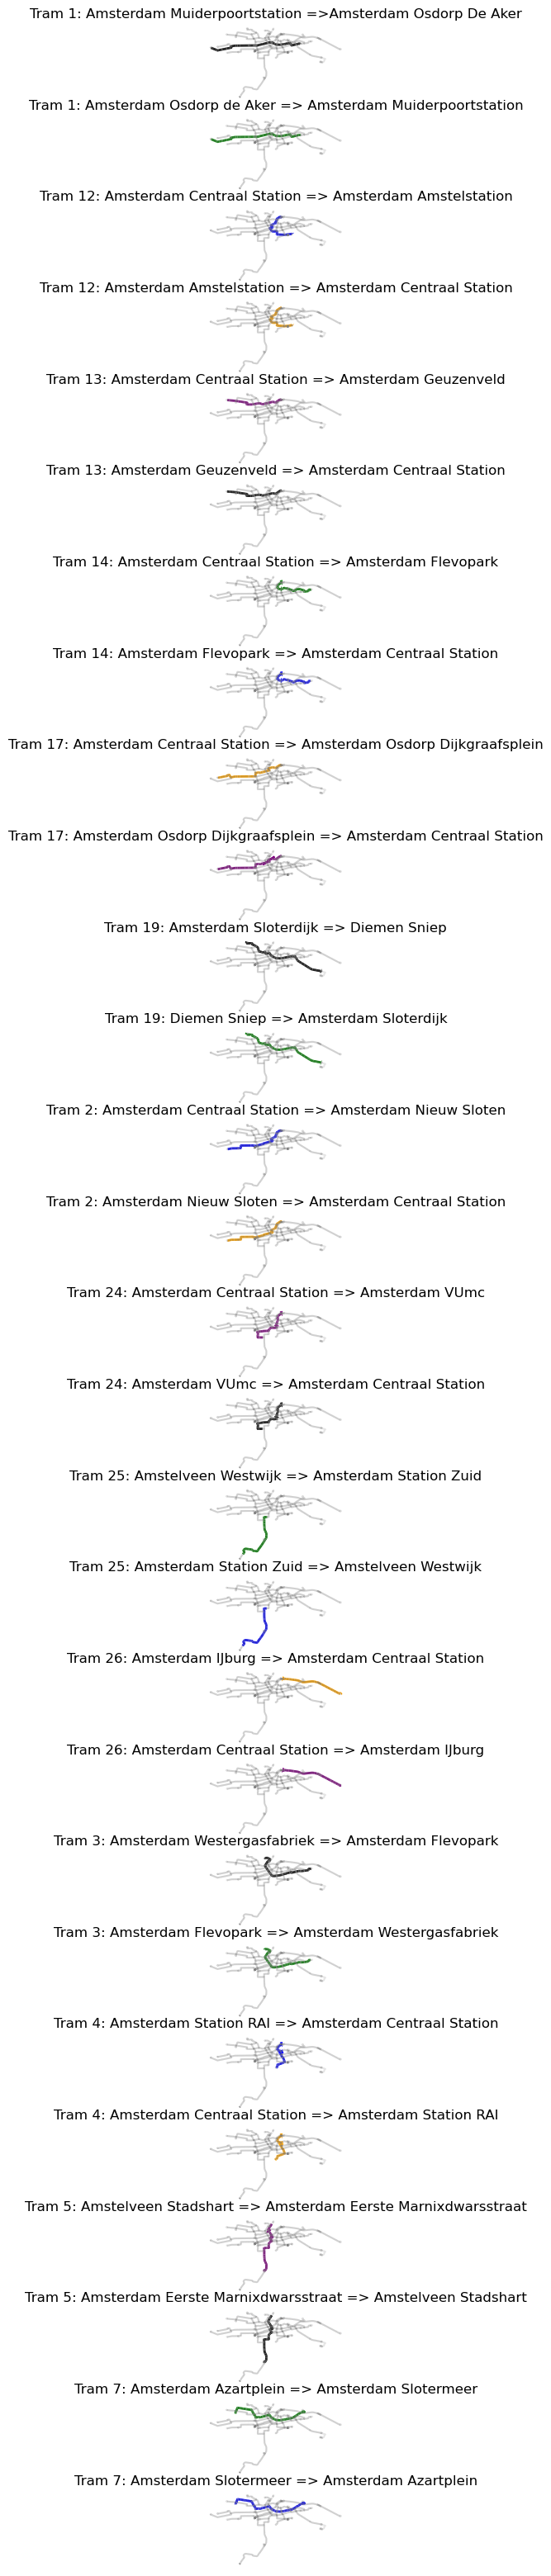

In [50]:
# Calculate the shortest path pairs for each subway line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# Plot all subway routes
plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

## Add columns to nodes

In [51]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [52]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   21                Muiderpoortstation  POINT (4.9326128 52.3607965)   
 1    0                      Dapperstraat  POINT (4.9289422 52.3609314)   
 2    6                    Linnaeusstraat  POINT (4.9257029 52.3601162)   
 3    7                         Beukenweg  POINT (4.9167422 52.3590732)   
 4    4         Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)   
 5    3                      Weesperplein  POINT (4.9071213 52.3610021)   
 6   22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 7    5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 8    1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 9   23                       Leidseplein  POINT (4.8810698 52.3632085)   
 10  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 11  24            Jan Pieter Hei

In [53]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, city_tram_nodes)

In [54]:
city_tram_new_nodes

geometry  degree    id                       name  \
0    POINT (4.93261 52.36080)       2  1341         Muiderpoortstation   
1    POINT (4.92894 52.36093)       2  1503               Dapperstraat   
2    POINT (4.92570 52.36012)       2  1606             Linnaeusstraat   
3    POINT (4.91674 52.35907)       2  1612                  Beukenweg   
4    POINT (4.91359 52.36235)       2  1598  Korte 's-Gravesandestraat   
..                        ...     ...   ...                        ...   
413  POINT (4.92630 52.36814)       2  1559      Eerste Coehoornstraat   
414  POINT (4.92960 52.37020)       2  1808    Eerste Leeghwaterstraat   
415  POINT (4.93483 52.37301)       2  1515               Rietlandpark   
416  POINT (4.93817 52.37346)       2  1751        C. van Eesterenlaan   
417  POINT (4.93735 52.37682)       2   414                 Azartplein   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
413  4.926300  52.368143  (4.9263002, 52.3681426)   
414  4.929600  52.370198  (4.9295997, 52.3701978)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   
416  4.938170  52.373460  (4.9381702, 52.3734596)   
417  4.937347  52.376818  (4.9373469, 52.3768181)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   

     transfer  
0        1, 3  
1        1, 3  
2        1, 3  
3        1, 3  
4    1, 19, 7  
..        ...  
413      None  
414      None  
415     26, 7  
416      None  
417      None  

[418 rows x 11 columns]

In [55]:
# city_tram_new_nodes.to_excel('./city_tram_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [56]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [57]:
city_tram_transfer_stations_df

geometry  degree    id                       name  \
0    POINT (4.93261 52.36080)       2  1341         Muiderpoortstation   
1    POINT (4.92894 52.36093)       2  1503               Dapperstraat   
2    POINT (4.92570 52.36012)       2  1606             Linnaeusstraat   
3    POINT (4.91674 52.35907)       2  1612                  Beukenweg   
4    POINT (4.91359 52.36235)       2  1598  Korte 's-Gravesandestraat   
..                        ...     ...   ...                        ...   
393  POINT (4.84859 52.37333)       2  1642        Jan van Galenstraat   
408  POINT (4.84872 52.37298)       2  1802        Jan van Galenstraat   
409  POINT (4.85007 52.37041)       2  1888              Mercatorplein   
411  POINT (4.91857 52.36337)       2  1803             Alexanderplein   
415  POINT (4.93483 52.37301)       2  1515               Rietlandpark   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
393  4.848589  52.373332  (4.8485891, 52.3733319)   
408  4.848724  52.372983  (4.8487242, 52.3729826)   
409  4.850068  52.370406  (4.8500681, 52.3704058)   
411  4.918568  52.363371  (4.9185684, 52.3633708)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   

                                       route_name_list route        ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram   1, 19, 7   
..                                                 ...   ...        ...   
393  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram  13, 19, 7   
408  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram  13, 19, 7   
409  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram      13, 7   
411  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram  14, 19, 7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram      26, 7   

      transfer  
0         1, 3  
1         1, 3  
2         1, 3  
3         1, 3  
4     1, 19, 7  
..         ...  
393  13, 19, 7  
408  13, 19, 7  
409      13, 7  
411  14, 19, 7  
415      26, 7  

[183 rows x 11 columns]

In [58]:
len(city_tram_transfer_stations_df)

183

## Add columns to edges

In [59]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [60]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     from_id  to_id     osm_id  \
 0         0      1    7045610   
 1      1341    628  770429442   
 2       628      0  770429442   
 3         1   1503  770438581   
 4      1503   1606  770438581   
 ..      ...    ...        ...   
 91      189    190   26594761   
 92     1777    189  322841907   
 93      190   1616  322841927   
 94     1616   1615  322841927   
 95     1615    847  322841927   
 
                                              geometry railway service    id  \
 0   LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram    None     0   
 1   LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram    None  1852   
 2   LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram    None  1853   
 3   LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram    None  1855   
 4   LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram    None  1856   
 ..                                        

In [61]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,city_tram_ordered_edges)

In [62]:
city_tram_new_edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2226  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2227  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2228  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2229  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2230  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2226    None  2199     1496    594   11.280287  0.000806       11   
2227    None  2200      562   1072   12.010525  0.000858       12   
2228    None  2201     1497    561   81.765515  0.005840       81   
2229    None  2202      566   1079   12.587379  0.000899       12   
2230    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  count_weight  \
0          (1, 0)       (0, 1)           1.0   
1          (3, 2)       (2, 3)           NaN   
2          (5, 4)       (4, 5)           1.0   
3          (7, 6)       (6, 7)           1.0   
4       (1730, 8)    (8, 1730)           1.0   
...           ...          ...           ...   
2226  (594, 1496)  (1496, 594)           NaN   
2227  (1072, 562)  (562, 1072)           NaN   
2228  (561, 1497)  (1497, 561)           NaN   
2229  (1079, 566)  (566, 1079)           NaN   
2230   (565, 552)   (552, 565)           NaN   

                                        route_name_list route  ref  
0     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1  
1                                                   NaN   NaN  NaN  
2     Tram 3: Amsterdam Westergasfabriek => Amsterda...  tram    3  
3     Tram 3: Amsterdam Flevopark => Amsterdam Weste...  tram    3  
4     Tram 14: Amsterdam Flevopark => Amsterdam Cent...  tram   14  
...                                                 ...   ...  ...  
2226                                                NaN   NaN  NaN  
2227                                                NaN   NaN  NaN  
2228                                                NaN   NaN  NaN  
2229                                                NaN   NaN  NaN  
2230                                                NaN   NaN  NaN  

[2231 rows x 16 columns]

# Bus-Amsterdam

## Generate bus networks

In [63]:
city_bus_stations, edges, nodes, city_bus_routes = prepare_bus(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████| 71634/71634 [00:09<00:00, 7749.56it/s]


In [64]:
city_bus_stations

osm_id public_transport railway  tram subway   highway  bus  \
9        45989456         platform    None  None   None  bus_stop  yes   
186     290955154         platform    None  None   None  bus_stop  yes   
238     311831619         platform    None  None   None  bus_stop  yes   
239     311831882         platform    None  None   None  bus_stop  yes   
243     318147070         platform    None  None   None  bus_stop  yes   
...           ...              ...     ...   ...    ...       ...  ...   
3846  10951641134    stop_position    None  None   None      None  yes   
3847  10951641135    stop_position    None  None   None      None  yes   
3850  10951641138    stop_position    None  None   None      None  yes   
3851  10951641142    stop_position    None  None   None      None  yes   
3853  10951641144    stop_position    None  None   None      None  yes   

                            name                  geometry     geo_x  \
9                     Nesserlaan  POINT (4.83890 52.27701)  4.838900   
186                 Badhoevelaan  POINT (4.79002 52.34049)  4.790015   
238                Oostzanerdijk  POINT (4.88103 52.42043)  4.881026   
239                Oostzanerdijk  POINT (4.88145 52.42022)  4.881446   
243                Kometensingel  POINT (4.88289 52.41662)  4.882885   
...                          ...                       ...       ...   
3846              Amsterdam, Dam  POINT (4.89149 52.37455)  4.891493   
3847      Amsterdam, Museumplein  POINT (4.88082 52.35868)  4.880820   
3850     Amsterdam, Parnassusweg  POINT (4.86883 52.33925)  4.868826   
3851  Arent Janszoon Ernststraat  POINT (4.86903 52.33164)  4.869026   
3853                  Kronenburg  POINT (4.87053 52.31653)  4.870530   

          geo_y  
9     52.277010  
186   52.340489  
238   52.420431  
239   52.420219  
243   52.416617  
...         ...  
3846  52.374554  
3847  52.358677  
3850  52.339245  
3851  52.331642  
3853  52.316525  

[3088 rows x 11 columns]

In [65]:
# city_bus_stations.to_excel('.\city_bus_stations.xlsx',header = True, index = False)

In [66]:
city_bus_edges = pd.DataFrame(edges.copy())
city_bus_nodes = pd.DataFrame(nodes.copy())

In [67]:
city_bus_routes = city_bus_routes.loc[city_bus_routes.network == 'Stadsvervoer Amsterdam']
city_bus_routes = city_bus_routes.loc[city_bus_routes.service != 'night']

In [68]:
city_bus_routes, check_name = check_bus_routes(city_bus_stations, city_bus_routes)

In [69]:
replacement_dict = {
    'Amsterdam, ': '',
    'Amsterdam': '',
    'Weesp Station': 'Station',
    'Osdorp De Aker': 'Matterhorn',
    'Schiphol, Airport/Plaza': 'Schiphol, Airport',
    'De Boelelaan': 'De Boelelaan/De Klencke'
}
replacement_dict1 = {
    'Amsterdam, ': '',
    'Amsterdam': '',
}

city_bus_stations['name'] = city_bus_stations['name'].replace(replacement_dict1, regex=True).str.strip()

city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

In [71]:
# Create a dictionary mapping bus routes to their starting station names
city_bus_start_station_name_dict = start_station_dict(city_bus_routes)

# Create a dictionary mapping bus lines to their line information
city_bus_line_dict = line_dict(city_bus_routes)

# Create a list of all station names
city_bus_all_stations_name = all_station_list(city_bus_stations)

# Create a dictionary mapping bus lines to the ordered route of stations
city_bus_order_route_dict = order_stations_inline(city_bus_line_dict, city_bus_all_stations_name, city_bus_routes, city_bus_start_station_name_dict)

# Create a dictionary mapping bus lines to their ordered ID pairs
city_bus_order_id_pairs = id_pairs_inline(city_bus_line_dict, city_bus_order_route_dict, nodes)

# Create the ground graph
G = create_ground_graph(city_bus_edges, city_bus_nodes)

# Create copies of dictionaries to store the analyzed data
city_bus_all_shortest_paths_id_dict = city_bus_order_id_pairs.copy()

# Iterate over each line in the bus order ID pairs
for line in city_bus_order_id_pairs.keys():
    # Compute all shortest paths for the line
    city_bus_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_bus_order_id_pairs[line], city_bus_edges)

In [80]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

In [72]:
city_bus_ordered_edges = edges_revise_direction(city_bus_all_shortest_paths_id_dict,city_bus_edges)
city_bus_ordered_edges

from_id  to_id      osm_id  \
0            0      1     4436684   
1            2      3     4495957   
2            4      5     4496429   
3            6  65237     4727308   
4        65237      7     4727308   
...        ...    ...         ...   
71623    65586  65587  1185077512   
71624    65588  65589  1185077519   
71625    65590  65591  1185077520   
71626    65592  65593  1185077524   
71627    65594  65595  1185077528   

                                                geometry  service     id  \
0      LINESTRING (4.9683596 52.3558775, 4.9683345 52...    steps      0   
1      LINESTRING (4.8601784 52.357593, 4.8601399 52....    steps      1   
2      LINESTRING (4.8743983 52.358788, 4.8744747 52....  service      2   
3      LINESTRING (4.9563878 52.377293, 4.9564629 52....     path      3   
4      LINESTRING (4.9564856 52.376881, 4.9564944 52....     path      4   
...                                                  ...      ...    ...   
71623  LINESTRING (4.795149 52.3318873, 4.7953163 52....  service  71623   
71624  LINESTRING (4.7974835 52.3325307, 4.7972201 52...  service  71624   
71625  LINESTRING (4.7967795 52.3323057, 4.7972519 52...  service  71625   
71626  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     path  71626   
71627  LINESTRING (4.7988313 52.3335157, 4.7987286 52...  service  71627   

        distance      time  weights railway         from_to         to_from  
0       4.049164  0.000324        4     bus          (0, 1)          (1, 0)  
1       7.754968  0.000620        7     bus          (2, 3)          (3, 2)  
2      68.807947  0.005505       68     bus          (4, 5)          (5, 4)  
3      46.383298  0.003711       46     bus      (6, 65237)      (65237, 6)  
4       2.090290  0.000167        2     bus      (65237, 7)      (7, 65237)  
...          ...       ...      ...     ...             ...             ...  
71623  29.884042  0.002391       29     bus  (65586, 65587)  (65587, 65586)  
71624  19.267219  0.001541       19     bus  (65588, 65589)  (65589, 65588)  
71625  34.723141  0.002778       34     bus  (65590, 65591)  (65591, 65590)  
71626  65.462451  0.005237       65     bus  (65592, 65593)  (65593, 65592)  
71627  41.888083  0.003351       41     bus  (65594, 65595)  (65595, 65594)  

[73609 rows x 12 columns]

In [73]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_bus_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
edges_list

[(0.0, 1.0, {'weight': 0.01943598665744528}),
 (2.0, 3.0, {'weight': 0.03722384502805132}),
 (4.0, 5.0, {'weight': 0.33027814590467297}),
 (6.0, 65237.0, {'weight': 0.2226398309370197}),
 (65237.0, 7.0, {'weight': 0.010033393727670372}),
 (8.0, 9.0, {'weight': 0.2072347771759584}),
 (10.0, 11.0, {'weight': 0.010972115115940276}),
 (12.0, 13.0, {'weight': 0.5035769968301506}),
 (14.0, 15.0, {'weight': 3.3558515670312987}),
 (16.0, 29398.0, {'weight': 1.428207997636663}),
 (29398.0, 41112.0, {'weight': 0.5131273986454964}),
 (41112.0, 17.0, {'weight': 1.1828190706205004}),
 (14.0, 20642.0, {'weight': 0.19213719324105294}),
 (20642.0, 18.0, {'weight': 0.26936614586037444}),
 (19.0, 20.0, {'weight': 0.02557331320986398}),
 (21.0, 27262.0, {'weight': 0.07225925639466096}),
 (27262.0, 27260.0, {'weight': 0.41019591892824153}),
 (27260.0, 27265.0, {'weight': 2.5807954663266846}),
 (27265.0, 22.0, {'weight': 0.06695702976652175}),
 (23.0, 24.0, {'weight': 0.07945924221580851}),
 (25.0, 15.0, {

In [74]:
# Extract the nodes from the input GeoDataFrame and create a list of node IDs
nodes_list = nodes.iloc[:,2].tolist()
nodes_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [75]:
G = nx.DiGraph()
for _, row in nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

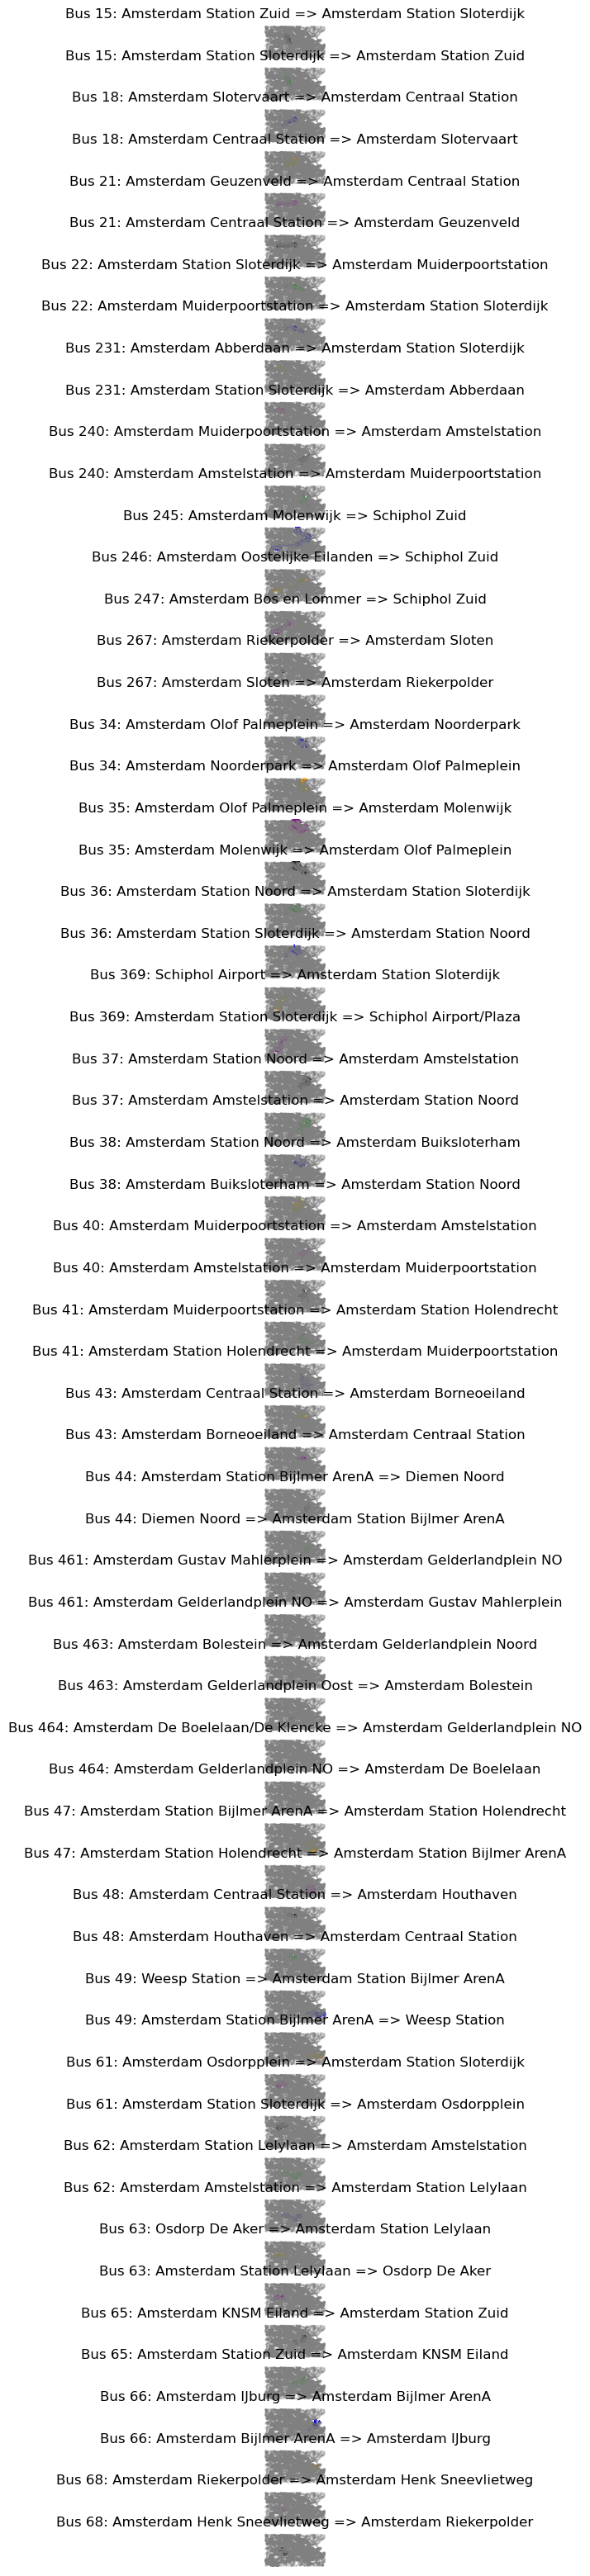

In [77]:
# Create copies of dictionaries to store the analyzed data
city_bus_shortest_path_pairs_dict = city_bus_order_id_pairs.copy()
city_bus_duplicate_row_count = city_bus_order_id_pairs.copy()
city_bus_shortest_path_edges_dict = city_bus_order_id_pairs.copy()
city_bus_edges_dict = city_bus_order_id_pairs.copy()

# Iterate over each line in the bus order ID pairs
for line in city_bus_order_id_pairs.keys():
    # Compute all shortest paths for the line
    city_bus_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_bus_order_id_pairs[line], city_bus_ordered_edges)
    
    # Compute edges with count and weight information for the line
    city_bus_duplicate_row_count[line], city_bus_shortest_path_edges_dict[line], city_bus_edges_dict[line] = edges_with_count_weight(city_bus_shortest_path_pairs_dict[line], city_bus_ordered_edges)

# # Plot the routes with even IDs
# plot_routes_even(city_bus_routes, edges, city_bus_shortest_path_edges)

# # Plot the routes with odd IDs
# plot_routes_odd(city_bus_routes, edges, city_bus_shortest_path_edges)

# Plot all the routes
plot_routes(city_bus_routes, city_bus_ordered_edges, city_bus_shortest_path_edges_dict)

<Axes: >

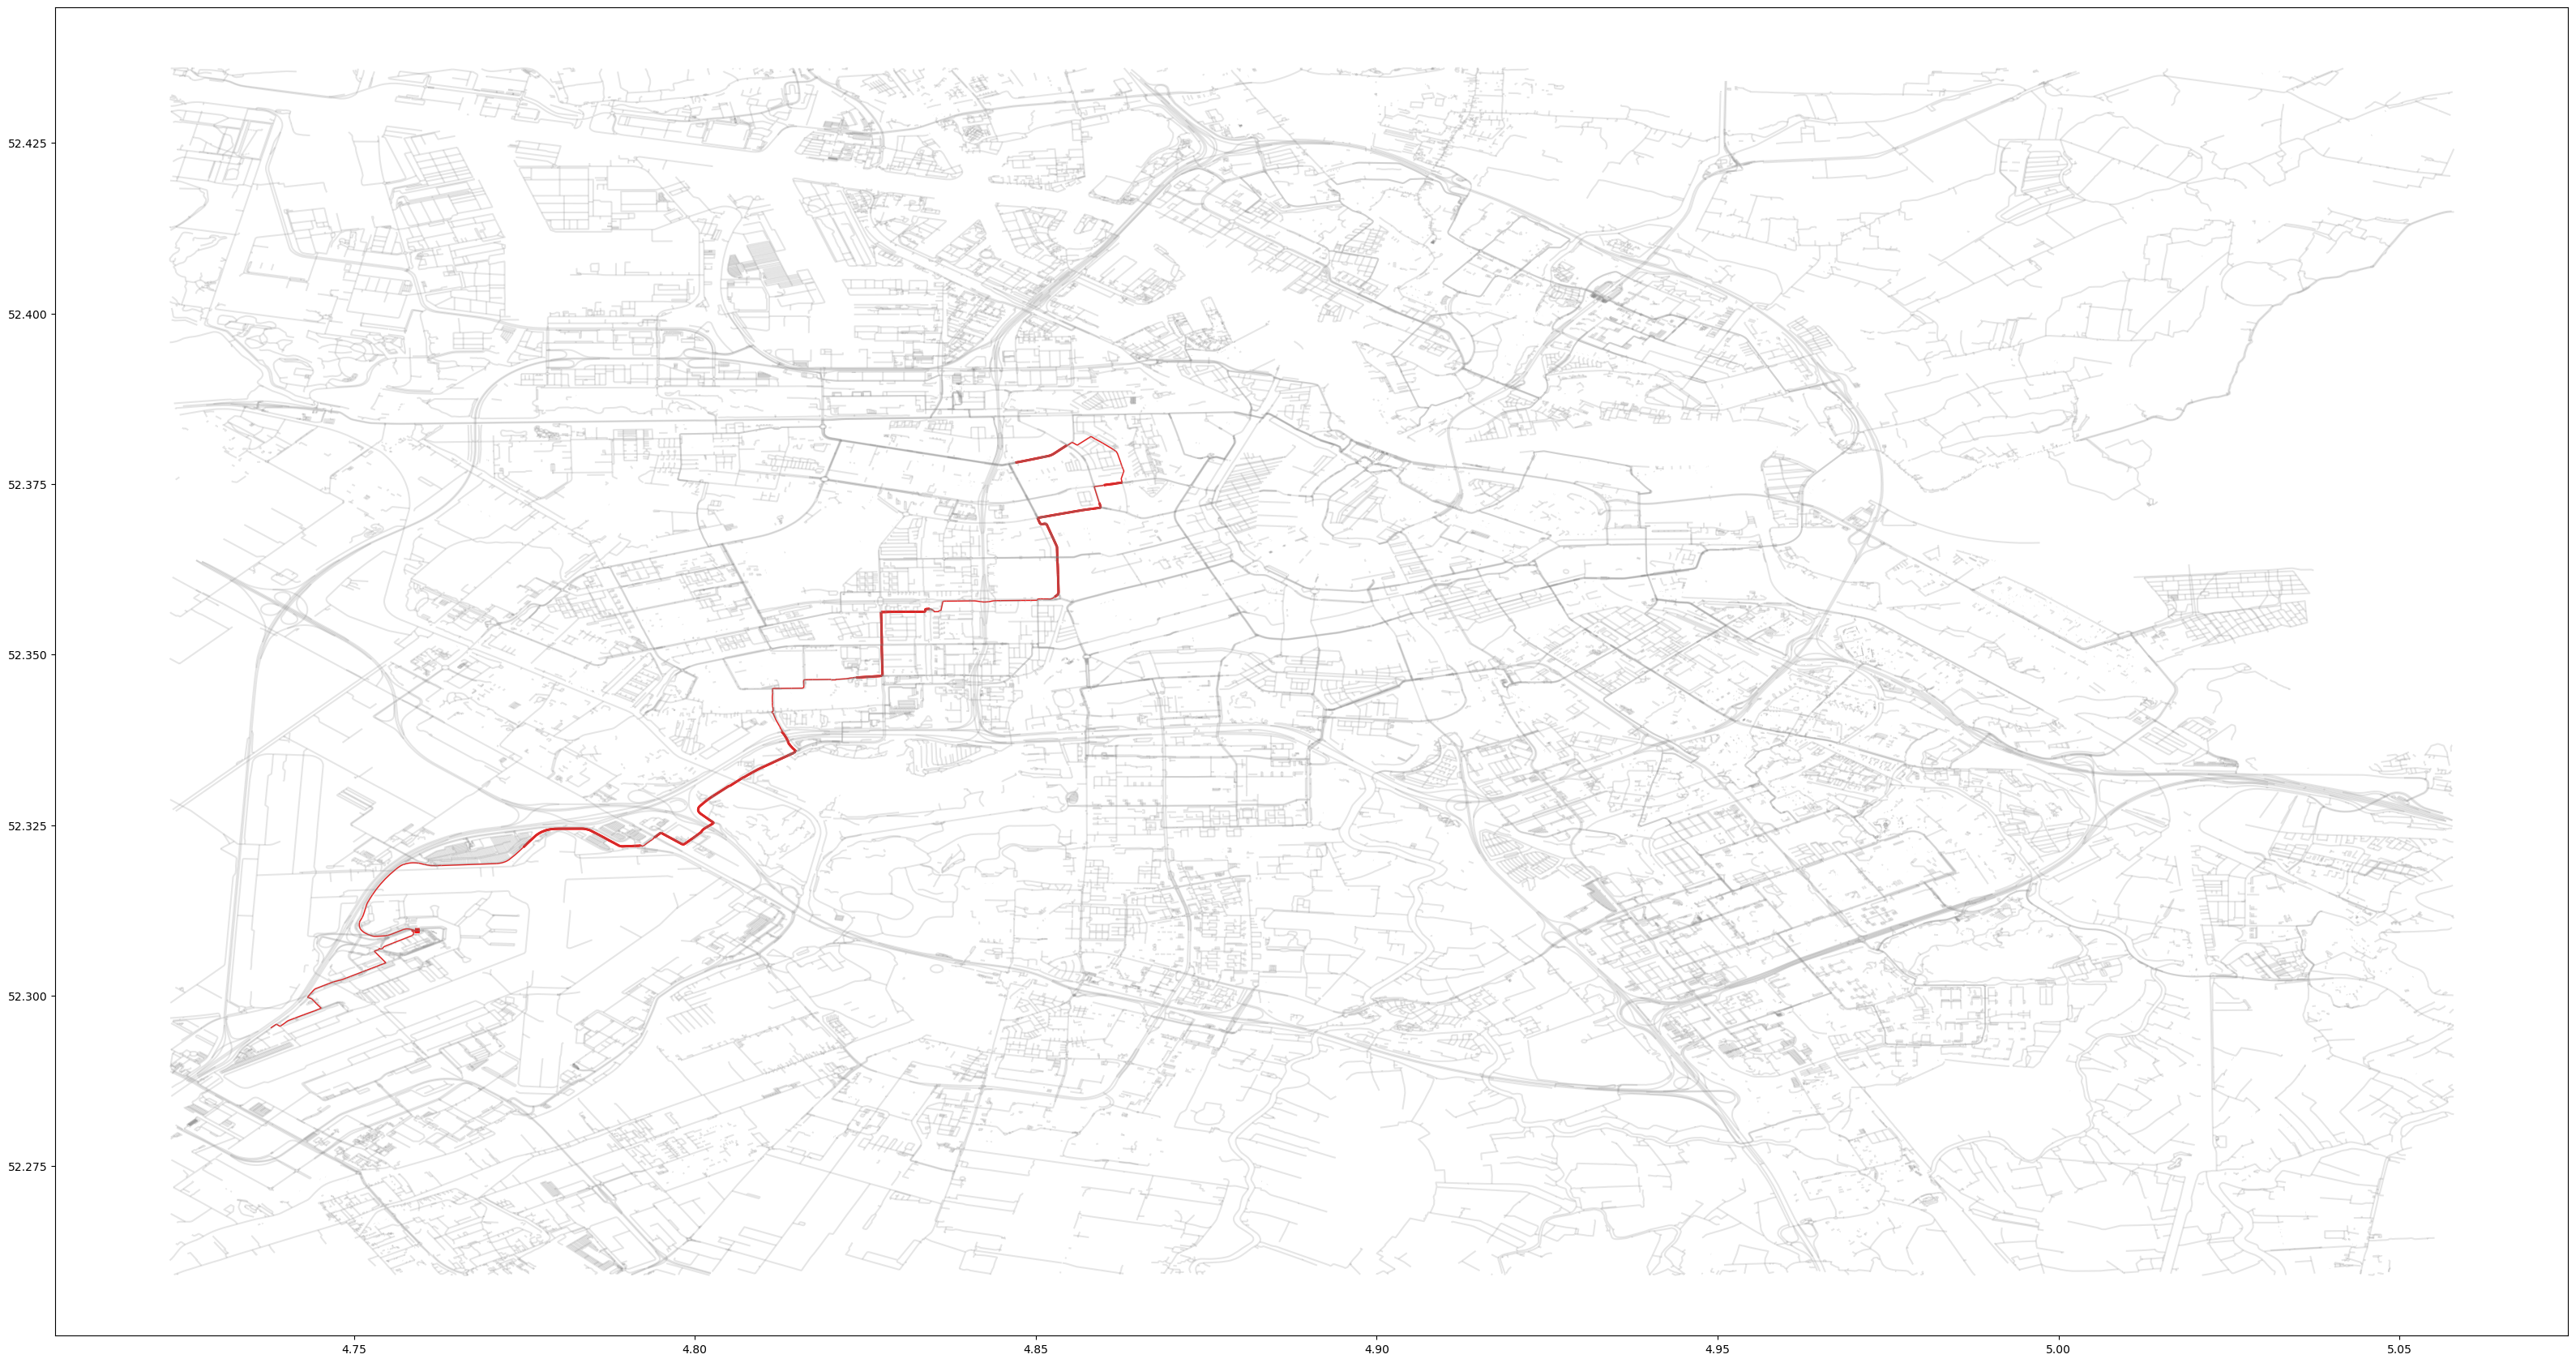

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
gpd.GeoDataFrame(city_bus_ordered_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(city_bus_shortest_path_edges_dict['Bus 247: Amsterdam Bos en Lommer => Schiphol Zuid'].copy()).plot(ax=ax, zorder=1,
                                                                     linewidth=(city_bus_shortest_path_edges_dict['Bus 247: Amsterdam Bos en Lommer => Schiphol Zuid'].count_weight),
                                                                     color='red')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
gpd.GeoDataFrame(bus_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(city_bus_shortest_path_edges_dict['Bus 34: Amsterdam Noorderpark => Amsterdam Olof Palmeplein'].copy()).plot(ax=ax, zorder=1,
                                                                     linewidth=(city_bus_shortest_path_edges_dict['Bus 34: Amsterdam Noorderpark => Amsterdam Olof Palmeplein'].count_weight) * 2,
                                                                     color='red')

In [ ]:
len(city_bus_order_route_dict)

In [ ]:
bus_edges

## Add columns to nodes

In [67]:
city_bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_order_route_dict, city_bus_routes)

In [68]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

In [69]:
city_bus_new_nodes = add_columns_to_nodes(city_bus_order_route_dict, city_bus_nodes)

In [70]:
city_bus_new_nodes

geometry  degree     id                   name     geo_x  \
0    POINT (4.87204 52.34082)       2  14779           Station Zuid  4.872035   
1    POINT (4.86829 52.34289)       2  67476    Prinses Irenestraat  4.868290   
2    POINT (4.86586 52.34629)       2  68204           Olympiaplein  4.865862   
3    POINT (4.85835 52.34525)       2  68196             Olympiaweg  4.858347   
4    POINT (4.85763 52.34922)       2  68341  Haarlemmermeerstation  4.857632   
..                        ...     ...    ...                    ...       ...   
752  POINT (4.99474 52.35561)       2  67471         Diemerparklaan  4.994741   
753  POINT (4.82444 52.34041)       3  15699    John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                    IBM  4.827888   
755  POINT (4.82867 52.34260)       3  26843             Parkeerdek  4.828668   
756  POINT (4.83306 52.34574)       2  31909      Henk Sneevlietweg  4.833059   

         geo_y         coordinate_value  \
0    52.340819  (4.8720355, 52.3408188)   
1    52.342894  (4.8682898, 52.3428941)   
2    52.346286   (4.865862, 52.3462864)   
3    52.345247  (4.8583469, 52.3452468)   
4    52.349218  (4.8576315, 52.3492179)   
..         ...                      ...   
752  52.355608   (4.9947414, 52.355608)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   
755  52.342595  (4.8286682, 52.3425954)   
756  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
..                                                 ...   ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
2           None  
3           None  
4         15, 62  
..           ...  
752         None  
753      267, 68  
754      267, 68  
755         None  
756         None  

[757 rows x 11 columns]

### retrive all transfer stations on each route

In [71]:
city_bus_transfer_stations_df = all_transfer_stations_df(city_bus_new_nodes)

In [72]:
city_bus_transfer_stations_df

geometry  degree     id                   name     geo_x  \
0    POINT (4.87204 52.34082)       2  14779           Station Zuid  4.872035   
1    POINT (4.86829 52.34289)       2  67476    Prinses Irenestraat  4.868290   
4    POINT (4.85763 52.34922)       2  68341  Haarlemmermeerstation  4.857632   
5    POINT (4.85667 52.35121)       2  68268             Zeilstraat  4.856667   
6    POINT (4.85607 52.35137)       2  68266        Amstelveenseweg  4.856072   
..                        ...     ...    ...                    ...       ...   
740  POINT (4.96581 52.31983)       0  66747             Tulastraat  4.965810   
741  POINT (4.97152 52.32169)       0  67123      Annie Romeinplein  4.971517   
742  POINT (4.97323 52.32306)       2  67461     Station Ganzenhoef  4.973228   
753  POINT (4.82444 52.34041)       3  15699    John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                    IBM  4.827888   

         geo_y         coordinate_value  \
0    52.340819  (4.8720355, 52.3408188)   
1    52.342894  (4.8682898, 52.3428941)   
4    52.349218  (4.8576315, 52.3492179)   
5    52.351210  (4.8566667, 52.3512098)   
6    52.351367  (4.8560722, 52.3513667)   
..         ...                      ...   
740  52.319830    (4.96581, 52.3198302)   
741  52.321685  (4.9715166, 52.3216851)   
742  52.323056   (4.9732278, 52.323056)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
5    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
6    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 62   
..                                                 ...   ...          ...   
740  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus   41, 47, 66   
741  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus       41, 66   
742  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus       41, 66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
4         15, 62  
5         15, 62  
6    15, 246, 62  
..           ...  
740   41, 47, 66  
741       41, 66  
742       41, 66  
753      267, 68  
754      267, 68  

[351 rows x 11 columns]

In [73]:
len(city_bus_transfer_stations_df)

351

## Add columns to edges

In [74]:
city_bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_shortest_path_edges_dict, city_bus_routes)

In [75]:
city_bus_shortest_path_edges

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':          osm_id                                           geometry  \
 0      26956728  LINESTRING (4.8720355 52.3408188, 4.8717707 52...   
 1      26956728  LINESTRING (4.8717707 52.3408097, 4.8716246 52...   
 2      26956728  LINESTRING (4.8705601 52.3407731, 4.8702988 52...   
 3      26956728  LINESTRING (4.8702988 52.3407626, 4.868856 52....   
 4      26982261  LINESTRING (4.8685173 52.3409372, 4.8684681 52...   
 ..          ...                                                ...   
 123   935010194  LINESTRING (4.8435054 52.3848361, 4.8436903 52...   
 124  1020818639  LINESTRING (4.8438138 52.3847277, 4.8438383 52...   
 125  1020818640  LINESTRING (4.8428612 52.3848254, 4.8435054 52...   
 126  1020818641  LINESTRING (4.8438898 52.3843611, 4.8439048 52...   
 127  1147115688  LINESTRING (4.8438493 52.3844829, 4.8438898 52...   
 
            service     id  from_id  to_id    distance      time  weights  \
 0 

In [76]:
city_bus_new_edges = add_columns_to_edges(city_bus_shortest_path_edges,city_bus_ordered_edges)

In [77]:
city_bus_new_edges

osm_id                                           geometry railway  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...     bus   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....     bus   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....     bus   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     bus   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     bus   
...           ...                                                ...     ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....     bus   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...     bus   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...     bus   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     bus   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...     bus   

       service     id  from_id  to_id   distance      time  weights  \
0        steps      0        0      1   4.049164  0.000324        4   
1        steps      1        2      3   7.754968  0.000620        7   
2      service      2        4      5  68.807947  0.005505       68   
3         path      3        6  65237  46.383298  0.003711       46   
4         path      4    65237      7   2.090290  0.000167        2   
...        ...    ...      ...    ...        ...       ...      ...   
71623  service  71623    65586  65587  29.884042  0.002391       29   
71624  service  71624    65588  65589  19.267219  0.001541       19   
71625  service  71625    65590  65591  34.723141  0.002778       34   
71626     path  71626    65592  65593  65.462451  0.005237       65   
71627  service  71627    65594  65595  41.888083  0.003351       41   

              to_from         from_to  count_weight route_name_list route  ref  
0              (0, 1)          (1, 0)           NaN             NaN   NaN  NaN  
1              (2, 3)          (3, 2)           NaN             NaN   NaN  NaN  
2              (4, 5)          (5, 4)           NaN             NaN   NaN  NaN  
3          (6, 65237)      (65237, 6)           NaN             NaN   NaN  NaN  
4          (65237, 7)      (7, 65237)           NaN             NaN   NaN  NaN  
...               ...             ...           ...             ...   ...  ...  
71623  (65586, 65587)  (65587, 65586)           NaN             NaN   NaN  NaN  
71624  (65588, 65589)  (65589, 65588)           NaN             NaN   NaN  NaN  
71625  (65590, 65591)  (65591, 65590)           NaN             NaN   NaN  NaN  
71626  (65592, 65593)  (65593, 65592)           NaN             NaN   NaN  NaN  
71627  (65594, 65595)  (65595, 65594)           NaN             NaN   NaN  NaN  

[71628 rows x 16 columns]